## **TASK 1:** WEB SCRAPING

**1. Project Title:** Web Scraping of Online News Articles Using Python

**2. Introduction:** In the modern digital world, a large amount of information is available on websites in unstructured form. Web scraping is a technique used to automatically extract useful data from websites and convert it into a structured format for analysis. This task focuses on collecting real-time news articles from an online news website using Python. The scraped data is later stored in a structured dataset for further analysis.

**3. Objective of Task 1:**

The main objectives of this task are:

1.   To collect real-world data from a public news website
2.   To extract important information such as:
     * Article link
     * Author name
     * Article title
     * Date of publication
     * Full article content
3.   To create a clean and structured dataset using Python

**4. Tools and Technologies Used**

| Tool / Library      | Purpose                              |
| ------------------- | ------------------------------------ |
| Python              | Programming language                 |
| Requests            | Sending HTTP requests to websites    |
| BeautifulSoup       | Parsing and extracting HTML content  |
| Pandas              | Storing scraped data in tabular form |
| Regular Expressions | Cleaning date formats                |

**5. Methodology (How Task 1 Was Performed)**

1. The web scraping process was completed using the following steps:

2. The target news website URL was identified.

3. An HTTP request was sent to the website using the Requests library.

4. HTML content was parsed using BeautifulSoup.

5. Required data was extracted by analyzing HTML tags and class names.

6. Individual article pages were visited to collect detailed information.

7. The extracted data was stored in a Pandas DataFrame.

8. The final dataset was prepared for further analysis.

**6. Task 1: Web Scraping Explanation**

✅ Use Python libraries like BeautifulSoup or Scrapy to extract data from websites → BeautifulSoup was used to read and extract information from HTML pages.

✅ Identify and collect relevant datasets from public web pages
→ News articles were collected from a public news website.

✅ Learn to handle HTML structure and web navigation
→ HTML tags such as h1, span, and div were analyzed to locate content.

✅ Create custom datasets tailored to specific analysis needs
→ A structured dataset was created using Pandas containing article details.

In [19]:
# Install required libraries
!pip install requests beautifulsoup4 pandas

In [20]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from datetime import datetime

**7. Dataset Description**

The final dataset contains the following columns:

| Column Name  | Description             |
| ------------ | ----------------------- |
| article_link | URL of the news article |
| writers_name | Name of the author      |
| title        | Title of the article    |
| date_posted  | Publication date        |
| article      | Full article text       |


In [21]:
# Function to scrape news articles from Punch Nigeria website
def scrapped_data():

    # Website URL to scrape news articles
    url = 'https://punchng.com/topics/news/'

    # Send HTTP request to the website
    request = requests.get(url)

    # Parse HTML content using BeautifulSoup
    soup = BeautifulSoup(request.text, 'html.parser')

    # Extract article links from homepage
    article_container = soup.find_all('h1', class_='post-title')
    links = [container.find('a')['href'] for container in article_container]

    # Create empty lists to store scraped data
    article_link = []
    writers_name = []
    title = []
    date_posted = []
    article = []

    # Visit each article link and extract information
    for link in links:
        response = requests.get(link)
        soup = BeautifulSoup(response.content, 'html.parser')

        article_link.append(link)

        # Extract writer name
        author_tag = soup.find('span', class_='post-author')
        writers_name.append(author_tag.get_text(strip=True) if author_tag else 'Unknown')

        # Extract article title
        title_tag = soup.find('h1', class_='post-title')
        title.append(title_tag.get_text(strip=True) if title_tag else 'No Title')

        # Extract publication date
        date_tag = soup.find('span', class_='post-date')
        if date_tag:
            date_str = date_tag.get_text(strip=True)
            date_str = re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)
            try:
                date = datetime.strptime(date_str, '%B %d, %Y %I:%M %p')
            except ValueError:
                date = datetime.strptime(date_str, '%B %d, %Y')
            date_posted.append(date.strftime('%Y-%m-%d %H:%M:%S'))
        else:
            date_posted.append('Unknown')

        # Extract article content
        content_tag = soup.find('div', class_='post-content')
        article.append(content_tag.get_text(strip=True) if content_tag else '')

    # Store data in a DataFrame
    article_data = pd.DataFrame({
        'article_link': article_link,
        'writers_name': writers_name,
        'title': title,
        'date_posted': date_posted,
        'article': article
    })

    return article_data

In [22]:
# Call the function and view data
article_data = scrapped_data()
article_data.head()

,article_link,writers_name,title,date_posted,article
0,https://punchng.com/why-nigerians-shouldnt-be-...,ByPeter Dada,Why Nigerians shouldn’t be afraid of new tax r...,2025-12-21 15:15:00,The Chairman of the Ondo State Internal Revenu...
1,https://punchng.com/frsc-deploys-officers-tow-...,ByGift Habib,"FRSC deploys officers, tow trucks to ease Abuj...",2025-12-21 14:51:00,The Federal Road Safety Corps has deployed add...
2,https://punchng.com/video-seyi-tinubu-arrives-...,ByDeborah Sanusi,VIDEO: Seyi Tinubu arrives Alaafin’s palace fo...,2025-12-21 14:49:00,The city of Oyo is currently witnessing an inf...
3,https://punchng.com/traditional-rulers-others-...,ByAbiodun Nejo,"Traditional rulers, others celebrate Ekiti mon...",2025-12-21 14:29:00,The Oore of Otun Ekiti and Paramount Ruler of ...
4,https://punchng.com/police-seek-citizens-coope...,Agency Report,Police seek citizens’ cooperation for safe hol...,2025-12-21 14:08:00,The Kogi State Police Command on Sunday urged ...


**8. Output of Task 1:**

* Successfully scraped real-world news articles

* Converted unstructured web data into structured format

* Created a reusable dataset for analysis



**9. Conclusion:** Task 1 successfully demonstrates the use of Python for web scraping. By using Requests and BeautifulSoup, real-time news data was collected automatically from a public website. The extracted data was cleaned and stored in a structured format using Pandas, making it suitable for further analysis such as sentiment analysis or trend detection.

🔁 **FLOWCHART:** WEB SCRAPING PROCESS

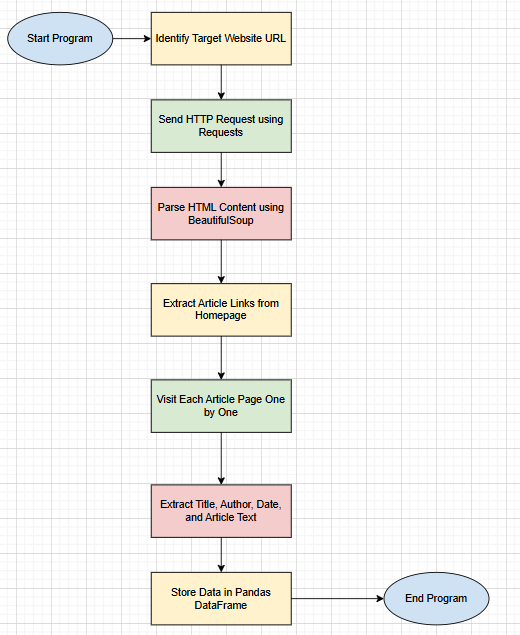